In [1]:
%run ~/relmapping/annot/notebooks/__init__.ipynb

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/b2/scratch/ahringer/jj374/lab/relmapping


In [2]:
# Load long cap jump & exon data
df_atac = pd.read_csv('annot/S1_accessible_sites/S1a_accessible_sites.tsv' % locals(), sep='\t')
df_atac.head()

,chrom,start,end,atac_mode,atac_source,atac_wt_emb_height,atac_wt_l1_height,atac_wt_l2_height,atac_wt_l3_height,atac_wt_l4_height,...,atac_glp1_d7_rep1_maxcount,atac_glp1_d7_rep2_maxcount,atac_glp1_d10_rep1_maxcount,atac_glp1_d10_rep2_maxcount,atac_glp1_d14_rep1_maxcount,atac_glp1_d14_rep2_maxcount,atac_gon2gem1_ya_rep1_maxcount,atac_gon2gem1_ya_rep2_maxcount,atac_gon2gem1_d3_rep1_maxcount,atac_gon2gem1_d3_rep2_maxcount
0,chrI,1870,2092,1981,atac_wt_se,1.621415,1.459215,1.354735,1.672520,1.204265,...,33.0,33.0,36.0,42.0,28.0,58.0,28.0,32.0,33.0,59.0
1,chrI,3809,3994,3901,atac_wt_pe,61.688004,55.224873,69.346062,123.587425,165.852905,...,1820.0,2072.0,1650.0,2596.0,1316.0,1422.0,2601.0,4677.0,2858.0,2812.0
2,chrI,4302,4410,4356,atac_wt_se,1.458345,2.518715,2.017625,3.193275,5.416205,...,50.0,37.0,67.0,65.0,39.0,58.0,72.0,98.0,59.0,98.0
3,chrI,11245,11465,11355,atac_wt_pe,2.679690,4.330160,9.348130,10.026175,10.876090,...,452.0,554.0,412.0,668.0,314.0,555.0,371.0,458.0,375.0,416.0
4,chrI,13087,13207,13147,atac_wt_pe,5.160855,3.462505,3.761785,3.173980,2.518795,...,53.0,61.0,63.0,116.0,68.0,103.0,76.0,95.0,64.0,95.0


In [3]:
df_atac[['chrom', 'start', 'end']].to_csv('annot/S1_accessible_sites/S1a_accessible_sites.bed', sep='\t', index=False, header=False)
len(df_atac)

42245

In [4]:
df_lcap = pd.read_csv('annot/S2_regulatory_annotation/_lcap_jump/lcap_summary.tsv' % locals(), sep='\t')
df_lcap.head()

,lcap_jump_wt_emb_fwd,lcap_jump_wt_emb_rev,lcap_jump_wt_l1_fwd,lcap_jump_wt_l1_rev,lcap_jump_wt_l2_fwd,lcap_jump_wt_l2_rev,lcap_jump_wt_l3_fwd,lcap_jump_wt_l3_rev,lcap_jump_wt_l4_fwd,lcap_jump_wt_l4_rev,...,lcap_incr_glp1_ya_fwd,lcap_incr_glp1_ya_rev,lcap_incr_glp1_d3_fwd,lcap_incr_glp1_d3_rev,lcap_incr_glp1_d7_fwd,lcap_incr_glp1_d7_rev,lcap_incr_glp1_d10_fwd,lcap_incr_glp1_d10_rev,lcap_incr_glp1_d14_fwd,lcap_incr_glp1_d14_rev
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,True,False,True,True,True,True,True,...,False,False,False,True,False,False,False,True,False,True
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# (Setup stranded structs)
df_prom_fwd = df_atac[['chrom', 'start', 'end']].copy()
df_prom_rev = df_atac[['chrom', 'start', 'end']].copy()
df_prom_fwd['mode_start'] = df_atac['atac_mode'].copy()
df_prom_rev['mode_start'] = df_atac['atac_mode'].copy()
df_prom_fwd['mode_end'] = df_prom_fwd['mode_start'].copy() + 1
df_prom_rev['mode_end'] = df_prom_rev['mode_start'].copy() + 1
df_prom_fwd['strand'] = '+'
df_prom_rev['strand'] = '-'

In [6]:
# df_exon1 / df_exon2: first/other exons, coordinates fixed to represent 5' ends
NAMES_EXON = ('chrom', 'start', 'end', 'transcript_id', 'score', 'strand', 'gene_id', 'gene_biotype', 'display_id')

df_exon1_fwd = pd.read_csv('WS260_ce10/WS260_ce10.exon_first.bed', sep='\t', names=NAMES_EXON).query('strand=="+"').reset_index(drop=True)
df_exon1_rev = pd.read_csv('WS260_ce10/WS260_ce10.exon_first.bed', sep='\t', names=NAMES_EXON).query('strand=="-"').reset_index(drop=True)
df_exon2_fwd = pd.read_csv('WS260_ce10/WS260_ce10.exon_other.bed', sep='\t', names=NAMES_EXON).query('strand=="+"').reset_index(drop=True)
df_exon2_rev = pd.read_csv('WS260_ce10/WS260_ce10.exon_other.bed', sep='\t', names=NAMES_EXON).query('strand=="-"').reset_index(drop=True)

# set boundaries to 5' end only
df_exon1_fwd['end'] = df_exon1_fwd['start'] + 1
df_exon2_fwd['end'] = df_exon2_fwd['start'] + 1
df_exon1_rev['start'] = df_exon1_rev['end'] - 1
df_exon2_rev['start'] = df_exon2_rev['end'] - 1

print(len(df_exon1_fwd), len(df_exon1_rev), len(df_exon2_fwd), len(df_exon2_rev))
df_exon1_fwd.head(5)

18730 17827 105509 99157


,chrom,start,end,transcript_id,score,strand,gene_id,gene_biotype,display_id
0,chrI,11495,11496,Y74C9A.2a.1,.,+,WBGene00022276,protein_coding,nlp-40
1,chrI,11495,11496,Y74C9A.2a.2,.,+,WBGene00022276,protein_coding,nlp-40
2,chrI,11499,11500,Y74C9A.2a.3,.,+,WBGene00022276,protein_coding,nlp-40
3,chrI,11505,11506,Y74C9A.2a.4,.,+,WBGene00022276,protein_coding,nlp-40
4,chrI,11618,11619,Y74C9A.2a.5,.,+,WBGene00022276,protein_coding,nlp-40


In [7]:
# Match hypersensitive sites to closest first/other exon
def df_closest(df_a, df_b, b_prefix, **kwargs):
    df_a_sort = df_a
    df_b_sort = df_b.sort_values(list(df_b.columns[:3]))
    fn_ = BedTool.from_dataframe(df_a).closest(BedTool.from_dataframe(df_b_sort).fn, **kwargs).fn
    names_ = list(itertools.chain(df_a.columns.values,
        ['%s_%s' % (b_prefix, col) for col in df_b.columns.values],
        ['%s_distance' % (b_prefix)]
    ))
    df_ = pd.read_csv(fn_, names=names_, sep='\t')
    return df_[names_[len(df_a.columns):]]

# Closest exon1 -- 200 upstream from atac_mode towards downstream
closest_exon1_flank = 200
df_ = pd.concat([df_atac['chrom'], df_atac['atac_mode'] - closest_exon1_flank, df_atac['atac_mode'] - closest_exon1_flank + 1], axis=1).copy()
df_exon1_fwd_out_ = df_closest(df_, df_exon1_fwd, 'exon1', D='ref', t='first', iu=True)
df_ = pd.concat([df_atac['chrom'], df_atac['atac_mode'] + closest_exon1_flank, df_atac['atac_mode'] + closest_exon1_flank + 1], axis=1).copy()
df_exon1_rev_out_ = df_closest(df_, df_exon1_rev, 'exon1', D='ref', t='first', id=True)

# Closest exon2 can be both upstream or downstream
df_ = pd.concat([df_atac['chrom'], df_atac['atac_mode'], df_atac['atac_mode'] + 1], axis=1).copy()
df_exon2_fwd_out_ = df_closest(df_, df_exon2_fwd, 'exon2', D='ref', t='first')
df_exon2_rev_out_ = df_closest(df_, df_exon2_rev, 'exon2', D='ref', t='first') 

df_exon_fwd = pd.concat([df_exon1_fwd_out_, df_exon2_fwd_out_], axis=1)
df_exon_rev = pd.concat([df_exon1_rev_out_, df_exon2_rev_out_], axis=1)

write_gffbed('annot/S2_regulatory_annotation/closest_exon_fwd.bed',
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_exon_fwd['exon1_transcript_id'],
    strand = '+',
    attr = df_exon_fwd[['exon1_transcript_id', 'exon1_gene_id', 'exon1_display_id', 'exon1_distance', 
                        'exon2_transcript_id', 'exon2_gene_id', 'exon2_display_id', 'exon2_distance']],
)

write_gffbed('annot/S2_regulatory_annotation/closest_exon_rev.bed',
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_exon_rev['exon1_transcript_id'],
    strand = '-',
    attr = df_exon_rev[['exon1_transcript_id', 'exon1_gene_id', 'exon1_display_id', 'exon1_distance', 
                        'exon2_transcript_id', 'exon2_gene_id', 'exon2_display_id', 'exon2_distance']],
)

df_exon_fwd.head()

,exon1_chrom,exon1_start,exon1_end,exon1_transcript_id,exon1_score,exon1_strand,exon1_gene_id,exon1_gene_biotype,exon1_display_id,exon1_distance,exon2_chrom,exon2_start,exon2_end,exon2_transcript_id,exon2_score,exon2_strand,exon2_gene_id,exon2_gene_biotype,exon2_display_id,exon2_distance
0,chrI,11495,11496,Y74C9A.2a.1,.,+,WBGene00022276,protein_coding,nlp-40,9714,chrI,11618,11619,Y74C9A.2a.1,.,+,WBGene00022276,protein_coding,nlp-40,9637
1,chrI,11495,11496,Y74C9A.2a.1,.,+,WBGene00022276,protein_coding,nlp-40,7794,chrI,11618,11619,Y74C9A.2a.1,.,+,WBGene00022276,protein_coding,nlp-40,7717
2,chrI,11495,11496,Y74C9A.2a.1,.,+,WBGene00022276,protein_coding,nlp-40,7339,chrI,11618,11619,Y74C9A.2a.1,.,+,WBGene00022276,protein_coding,nlp-40,7262
3,chrI,11495,11496,Y74C9A.2a.1,.,+,WBGene00022276,protein_coding,nlp-40,340,chrI,11618,11619,Y74C9A.2a.1,.,+,WBGene00022276,protein_coding,nlp-40,263
4,chrI,43733,43734,Y74C9A.1,.,+,WBGene00022275,protein_coding,Y74C9A.1,30786,chrI,11623,11624,Y74C9A.2a.4,.,+,WBGene00022276,protein_coding,nlp-40,-1524


In [8]:
# Visualise first calls
df_exon1_fwd_out_.to_csv('annot/S2_regulatory_annotation/exon1_fwd.tsv', header=True, index=False, sep='\t')
df_exon1_rev_out_.to_csv('annot/S2_regulatory_annotation/exon1_rev.tsv', header=True, index=False, sep='\t')
df_exon2_fwd_out_.to_csv('annot/S2_regulatory_annotation/exon2_fwd.tsv', header=True, index=False, sep='\t')
df_exon2_rev_out_.to_csv('annot/S2_regulatory_annotation/exon2_rev.tsv', header=True, index=False, sep='\t')

In [9]:
# maximum gap between hypersensitive site and downstream first exons
def maxgap(a): return max(len(list(g)) if (k == 0) or (k != k) else 0 for k,g in itertools.groupby(a))

def nanmaxgap(a): return maxgap([e if e == e else 0 for e in a])

def maxgap_fwd(fp_inp, chroms, atac_modes, exon1_starts, flank_len=300):
    l = []
    fh = pyBigWig.open(fp_inp)
    for (chrom, atac_mode, exon1_start) in itertools.islice(zip(chroms, atac_modes, exon1_starts), None):
        # Interval between atac-mode (+flank), and 5'-end of closest downstream exonl clipped by chromosome ends
        start_ = max(atac_mode + flank_len, 0)
        end_ = min(exon1_start + 1, fh.chroms(chrom))
        if start_ < end_:
            l.append(nanmaxgap(np.array(fh.values(chrom, int(start_), int(end_)))))
        else:
            l.append(-1)
    fh.close()
    return l

def maxgap_rev(fp_inp, chroms, atac_modes, exon1_ends, flank_len=300):
    l = []
    fh = pyBigWig.open(fp_inp)
    for (chrom, atac_mode, exon1_end) in itertools.islice(zip(chroms, atac_modes, exon1_ends), None):
        # Interval between atac-mode (+flank), and 5'-end of closest downstream exonl clipped by chromosome ends
        start_ = max(exon1_end - 1, 0)
        end_ = min(atac_mode - flank_len + 1, fh.chroms(chrom))
        if start_ < end_:
            l.append(nanmaxgap(np.array(fh.values(chrom, int(start_), int(end_)))))
        else:
            l.append(-1)
    fh.close()
    return l

fp_maxgap = 'annot/S2_regulatory_annotation/maxgap.tsv'

# "Lazy memoization for computing maxgap"
if not (os.path.isfile(fp_maxgap)):
    df_maxgap = pd.DataFrame()
    for stage in itertools.islice(config['stages'], None):
        fp_fwd = pf('lcap_%s' % (stage,), 'coverage_q10_reads_by_stage_fwd', '.bw', 'lcap_geo')
        fp_rev = pf('lcap_%s' % (stage,), 'coverage_q10_reads_by_stage_rev', '.bw', 'lcap_geo')
        print(os.path.isfile(fp_fwd))
        print(os.path.isfile(fp_rev))
        df_maxgap['maxgap_fwd_%s' % (stage,)] = maxgap_fwd(fp_fwd, df_atac['chrom'], df_atac['atac_mode'], df_exon_fwd['exon1_start'])
        df_maxgap['maxgap_rev_%s' % (stage,)] = maxgap_rev(fp_rev, df_atac['chrom'], df_atac['atac_mode'], df_exon_rev['exon1_end'])
    df_maxgap.to_csv(fp_maxgap, header=True, index=False, sep='\t')

df_maxgap = pd.read_csv(fp_maxgap, sep='\t')
assert len(df_maxgap) == len(df_atac)
for stage in itertools.islice(config['stages'], None):
    print("%s %s %s" % (stage,
                        len(df_maxgap.query('maxgap_fwd_%s == 0' % (stage,))),
                        len(df_maxgap.query('maxgap_rev_%s == 0' % (stage,)))))

wt_emb 7426 7295
wt_l1 10186 9924
wt_l2 11503 11213
wt_l3 8732 8450
wt_l4 8653 8390
wt_ya 5555 5310
glp1_ya 8026 7489
glp1_d3 6416 6195
glp1_d7 8487 8020
glp1_d10 8646 8308
glp1_d14 9414 9213


In [10]:
# Visualise maxgap as .bed-files
def itemRgb_(maxgap_):
    if maxgap_ == 0:
        return RED
    else:
        return BLUE
    
write_gffbed('annot/S2_regulatory_annotation/maxgap_fwd.bed',
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_maxgap[df_maxgap.columns[0::2].tolist()].min(axis=1),
    strand = '+',
    attr = df_maxgap[df_maxgap.columns[0::2].tolist()],
    itemRgb = map(itemRgb_, df_maxgap[df_maxgap.columns[0::2].tolist()].min(axis=1)),
)

write_gffbed('annot/S2_regulatory_annotation/maxgap_rev.bed',
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_maxgap[df_maxgap.columns[1::2].tolist()].min(axis=1),
    strand = '-',
    attr = df_maxgap[df_maxgap.columns[1::2].tolist()],
    itemRgb = map(itemRgb_, df_maxgap[df_maxgap.columns[1::2].tolist()].min(axis=1)),
)

!wc -l annot/S2_regulatory_annotation/maxgap_fwd.bed
!wc -l annot/S2_regulatory_annotation/maxgap_rev.bed

42246 annot/S2_regulatory_annotation/maxgap_fwd.bed
42246 annot/S2_regulatory_annotation/maxgap_rev.bed


In [11]:
# scap_count <- <scap tags within region>; scap_mode_raw <- <scap mode position>; scap_mode_count <- <tags at mode>
fp_fwd = pf('scap541_emb_l3_ya', 'tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.rm_non_coding.firstbp_fwd.rm_exonic', '.bw', 'scap')
fp_rev = pf('scap541_emb_l3_ya', 'tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.rm_non_coding.firstbp_rev.rm_exonic', '.bw', 'scap')

flank_len = 100
chroms_ = list(df_atac['chrom'])
starts_ = list(df_atac['atac_mode'] - flank_len)
ends_ =  list(df_atac['atac_mode'] + flank_len)

df_prom_fwd['scap_count'] = list(map(lambda c: int(np.nansum(c)), yp.read_regions(fp_fwd, chroms_, starts_, ends_)))
df_prom_rev['scap_count'] = list(map(lambda c: int(np.nansum(c)), yp.read_regions(fp_rev, chroms_, starts_, ends_)))

def mode_raw_(s, c):
    return int(s + yp.nanargmax_median(c))
df_prom_fwd['scap_mode_raw'] = list(map(mode_raw_, starts_, yp.read_regions(fp_fwd, chroms_, starts_, ends_)))
df_prom_rev['scap_mode_raw'] = list(map(mode_raw_, starts_, yp.read_regions(fp_rev, chroms_, starts_, ends_)))

df_prom_fwd['scap_mode_count'] = list(map(yp.nanmax, yp.read_regions(fp_fwd, chroms_, starts_, ends_)))
df_prom_rev['scap_mode_count'] = list(map(yp.nanmax, yp.read_regions(fp_rev, chroms_, starts_, ends_)))

n = float(len(df_atac))
n_scap_fwd = len(df_prom_fwd.query('scap_mode_count >= 2'))
n_scap_rev = len(df_prom_rev.query('scap_mode_count >= 2'))
n_scap_bid = sum((df_prom_fwd['scap_mode_count'] >= 2) & (df_prom_rev['scap_mode_count'] >= 2))
n_scap_either = sum((df_prom_fwd['scap_mode_count'] >= 2) | (df_prom_rev['scap_mode_count'] >= 2))
print(n_scap_fwd, n_scap_rev, n_scap_bid, n_scap_either, 'fwd/rev/both/either in pooled scap')
print(n_scap_fwd / n, n_scap_rev / n, n_scap_bid / n, n_scap_either / n)
m = (df_prom_fwd['scap_mode_count'] >= 2) & (df_prom_rev['scap_mode_count'] >= 2)
print(np.median(df_prom_fwd[m]['scap_mode_raw'] - df_prom_rev[m]['scap_mode_raw']), 'median mode >= 2 tags')
m = (df_prom_fwd['scap_mode_count'] >= 10) & (df_prom_rev['scap_mode_count'] >= 10)
print(np.median(df_prom_fwd[m]['scap_mode_raw'] - df_prom_rev[m]['scap_mode_raw']), 'median mode (>= 10 tags)')

/mnt/home1/ahringer/jj374/relmapping/scripts/yarp/yarp.py:589: RuntimeWarning: All-NaN slice encountered
  a_max = np.nanmax(a)
/mnt/home1/ahringer/jj374/relmapping/scripts/yarp/yarp.py:155: RuntimeWarning: All-NaN slice encountered
  nanmax_ = np.nanmax(c)


28073 27943 21647 34369 fwd/rev/both/either in pooled scap
0.6645283465498876 0.6614510592969582 0.512415670494 0.813563735353
89.0 median mode >= 2 tags
103.0 median mode (>= 10 tags)


In [12]:
# "Extrapolate" likely regions of txn initiation based on peak accessibility
# On average, short cap modes are spaced by 120bp
# Extrapolate short cap modes by peak accessibility +/- 60 (120bp/2) if no short cap mode was found
# (These "extrapolated" short cap modes can be discarded by filtering for scap_mode_count > 0)
def scap_mode_fwd_(scap_mode_raw, scap_mode_count, atac_mode):
    if scap_mode_count > 0:
        return scap_mode_raw
    else:
        return atac_mode + 60

def scap_mode_rev_(scap_mode_raw, scap_mode_count, atac_mode):
    if scap_mode_count > 0:
        return scap_mode_raw
    else:
        return atac_mode - 60

df_prom_fwd['scap_mode'] = list(map(scap_mode_fwd_, df_prom_fwd['scap_mode_raw'], df_prom_fwd['scap_mode_count'], df_atac['atac_mode']))
df_prom_rev['scap_mode'] = list(map(scap_mode_rev_, df_prom_rev['scap_mode_raw'], df_prom_rev['scap_mode_count'], df_atac['atac_mode']))
print('%d / %d sites with extrapolated txn initiation' % (
    len(df_prom_fwd.query('scap_mode_count == 0')), 
    len(df_prom_rev.query('scap_mode_count == 0'))
))

7301 / 7259 sites with extrapolated txn initiation


In [13]:
# Stage-specific annotation
d_annot_strand_legend = collections.OrderedDict([
    ('coding_promoter', yp.RED),
    ('pseudogene_promoter', yp.ORANGE),
    ('non-coding_RNA', yp.BLACK),
    ('unknown_promoter', yp.YELLOW),
    ('transcription_initiation', yp.GREEN),
    ('no_transcription', yp.BLUE),
])

d_annot_legend = collections.OrderedDict([
    ('coding_promoter', yp.RED),
    ('pseudogene_promoter', yp.ORANGE),
    ('non-coding_RNA', yp.BLACK),
    ('unknown_promoter', yp.YELLOW),
    ('putative_enhancer', yp.GREEN),
    ('other_element', yp.BLUE),
])

def prom_summary_stage(l_chrom, l_start, l_end, l_jump, l_incr, l_maxgap, l_exon1_dist, l_exon2_dist, l_has_scap, l_scap_diff, l_gene_biotype):
    for (chrom, start, end, jump, incr, maxgap, exon1_dist, exon2_dist, scap_mode_count, scap_diff, gene_biotype) in \
            zip(l_chrom, l_start, l_end, l_jump, l_incr, l_maxgap, l_exon1_dist, l_exon2_dist, l_has_scap, l_scap_diff, l_gene_biotype):

        near_exon1 = abs(exon1_dist) < 300
        near_exon2 = abs(exon2_dist) < 300
        has_scap = scap_mode_count >= 2
        
        is_gene_biotype = (gene_biotype == 'protein_coding') | (gene_biotype == 'pseudogene')

        v = False
        #if chrom == "chrI" and start == 183421 and end == 183568: v = True

        # "General case" -- hypersensitive site is away from all exons
        if not(near_exon1 or near_exon2):
            if (incr or jump) and (is_gene_biotype) and (maxgap == 0):
                #if v: print('coding_promoter0')
                yield 'coding_promoter' if (gene_biotype == 'protein_coding') else 'pseudogene_promoter'
            elif jump:
                if v: print('unknown_promoter0')
                yield 'unknown_promoter'
            elif has_scap:
                if v: print('transcription_initiation0')
                yield 'transcription_initiation'
            else:
                if v: print('no_transcription0')
                yield 'no_transcription'

        # "Special cases" -- elongation increase could be due to a nearby exon
        # exception #1: closest annotation is non-coding
        elif near_exon1 and not (is_gene_biotype):
            if v: print('non-coding_RNA')
            yield 'non-coding_RNA'

        # 5' end of first exon is within 300bp downstream of `atac_mode`
        elif near_exon1 and is_gene_biotype and (exon1_dist >= 0):
            # long cap has a clear 'raft'
            if incr:
                if v: print('coding_promoter1a')
                yield 'coding_promoter' if (gene_biotype == 'protein_coding') else 'pseudogene_promoter'
            # exception #3: upstream-ish sites
            elif jump and has_scap:
                if v: print('coding_promoter1b')
                yield 'coding_promoter' if (gene_biotype == 'protein_coding') else 'pseudogene_promoter'
                #if gene_biotype == 'protein_coding' else 'non-coding_RNA'
            elif has_scap:
                if v: print('transcription_initiation1')
                yield 'transcription_initiation'
            else:
                if v: print('no_transcription1')
                yield 'no_transcription'

        # 5' end of first exon is within 300bp upstream of `atac_mode`
        elif near_exon1 and is_gene_biotype and (exon1_dist < 0):
            if incr:
                if v: print('coding_promoter2a', scap_mode_count, has_scap)
                yield 'coding_promoter' if (gene_biotype == 'protein_coding') else 'pseudogene_promoter'
            elif jump and has_scap and (abs(scap_diff) < 50):
                if v: print('coding_promoter2b', scap_mode_count, has_scap)
                yield 'coding_promoter' if (gene_biotype == 'protein_coding') else 'pseudogene_promoter'
            elif has_scap:
                if v: print('transcription_initiation2')
                yield 'transcription_initiation'
            else:
                if v: print('no_transcription2')
                yield 'no_transcription'

        # Site has to overlap non-first exon
        else:
            assert(near_exon2)
            if has_scap:
                if v: print('no_transcription3')
                yield 'transcription_initiation'
            else:
                if v: print('no_transcription3')
                yield 'no_transcription'

for stage in itertools.islice(config['stages'], None):
    print(stage, 'fwd')
    df_prom_fwd['annot_%s' % (stage,)] = list(prom_summary_stage(
        df_atac['chrom'], df_atac['start'], df_atac['end'],
        df_lcap['lcap_jump_%s_fwd' % (stage,)],
        df_lcap['lcap_incr_%s_fwd' % (stage,)],
        df_maxgap['maxgap_fwd_%s' % (stage,)],
        df_exon_fwd['exon1_start'] - df_atac['atac_mode'],
        df_exon_fwd['exon2_start'] - df_atac['atac_mode'],
        df_prom_fwd['scap_mode_count'],
        df_prom_fwd['scap_mode'] - df_exon_fwd['exon1_start'],
        df_exon_fwd['exon1_gene_biotype'],
    ))
    print(stage, 'rev')
    df_prom_rev['annot_%s' % (stage,)] = list(prom_summary_stage(
        df_atac['chrom'], df_atac['start'], df_atac['end'],
        df_lcap['lcap_jump_%s_rev' % (stage,)],
        df_lcap['lcap_incr_%s_rev' % (stage,)],
        df_maxgap['maxgap_rev_%s' % (stage,)],
        df_atac['atac_mode'] - (df_exon_rev['exon1_end'] - 1),
        df_atac['atac_mode'] - (df_exon_rev['exon2_end'] - 1),
        df_prom_rev['scap_mode_count'],
        (df_exon_rev['exon1_end'] - 1) - df_prom_rev['scap_mode'],
        df_exon_rev['exon1_gene_biotype'],
    ))

wt_emb fwd
wt_emb rev
wt_l1 fwd
wt_l1 rev
wt_l2 fwd
wt_l2 rev
wt_l3 fwd
wt_l3 rev
wt_l4 fwd
wt_l4 rev
wt_ya fwd
wt_ya rev
glp1_ya fwd
glp1_ya rev
glp1_d3 fwd
glp1_d3 rev
glp1_d7 fwd
glp1_d7 rev
glp1_d10 fwd
glp1_d10 rev
glp1_d14 fwd
glp1_d14 rev


In [14]:
# Aggregate stage-specific annotations across stages
def annot_summary(l_annot):
    l_ranking = list(d_annot_strand_legend.keys())
    l_annot_i = [l_ranking.index(annot) for annot in l_annot]
    return l_ranking[min(l_annot_i)]

df_prom_fwd['annot_summary'] = list(map(lambda ir: annot_summary(ir[1].tolist()),
    df_prom_fwd[['annot_%(stage)s' % locals() for stage in config['stages']]].iterrows()))

df_prom_rev['annot_summary'] = list(map(lambda ir: annot_summary(ir[1].tolist()),
    df_prom_rev[['annot_%(stage)s' % locals() for stage in config['stages']]].iterrows()))

In [15]:
# Forward strand annotation summary
df_fwd_ = pd.concat([df_prom_fwd['annot_%(stage)s' % locals()].value_counts() for stage in config['stages'] + ['summary']], axis=1).loc[d_annot_strand_legend.keys()]
df_fwd_.columns = config['stages'] + ['summary']
#df_fwd_.to_latex('%(dm_step)s_fig/prom_summary_rev.latex' % locals())
df_fwd_

,wt_emb,wt_l1,wt_l2,wt_l3,wt_l4,wt_ya,glp1_ya,glp1_d3,glp1_d7,glp1_d10,glp1_d14,summary
coding_promoter,3910,4168,4781,4205,4246,4042,3723,3468,3618,3502,3374,8047
pseudogene_promoter,83,72,79,64,84,87,67,55,67,53,68,193
non-coding_RNA,533,533,533,533,533,533,533,533,533,533,533,533
unknown_promoter,587,803,1056,557,449,368,810,673,833,907,865,2600
transcription_initiation,23557,23228,22435,23372,23483,23713,23785,24145,23872,23984,24081,18725
no_transcription,13575,13441,13361,13514,13450,13502,13327,13371,13322,13266,13324,12147


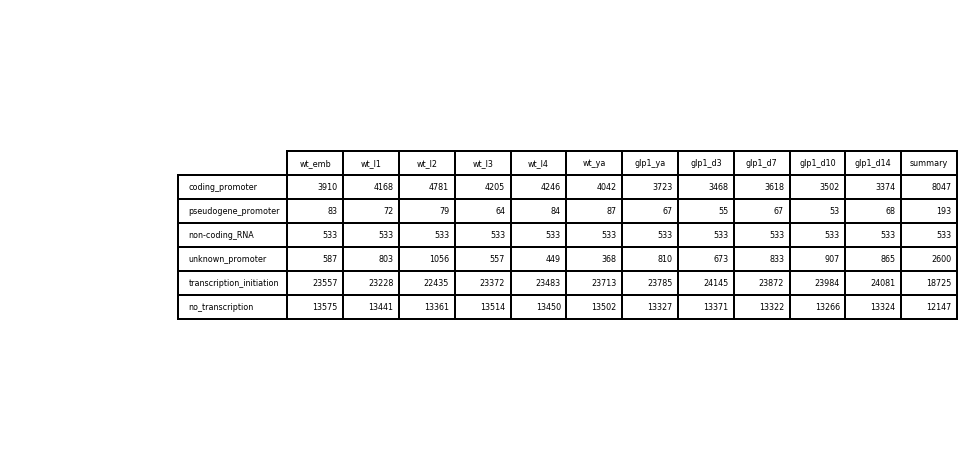

In [16]:
plt.subplot(111, frame_on=False)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)
pd.plotting.table(data=df_fwd_, ax=plt.gca(), loc='center left')
#plt.savefig('annot/FigA_mapping/annot_crosstab_fwd.pdf', bbox_inches='tight')

In [17]:
# Reverse strand annotation summary
df_rev_ = pd.concat([df_prom_rev['annot_%(stage)s' % locals()].value_counts() for stage in config['stages'] + ['summary']], axis=1).loc[d_annot_strand_legend.keys()]
df_rev_.columns = config['stages'] + ['summary']
#df_rev_.to_latex('%(dm_step)s_fig/prom_summary_rev.latex' % locals())
df_rev_

,wt_emb,wt_l1,wt_l2,wt_l3,wt_l4,wt_ya,glp1_ya,glp1_d3,glp1_d7,glp1_d10,glp1_d14,summary
coding_promoter,3897,4077,4702,4188,4259,4027,3685,3456,3595,3456,3330,7871
pseudogene_promoter,99,89,102,96,107,96,64,55,73,66,58,215
non-coding_RNA,529,529,529,529,529,529,529,529,529,529,529,529
unknown_promoter,569,741,1019,533,525,376,725,574,800,832,770,2464
transcription_initiation,23435,23209,22393,23278,23284,23586,23768,24140,23819,23958,24085,18827
no_transcription,13716,13600,13500,13621,13541,13631,13474,13491,13429,13404,13473,12339


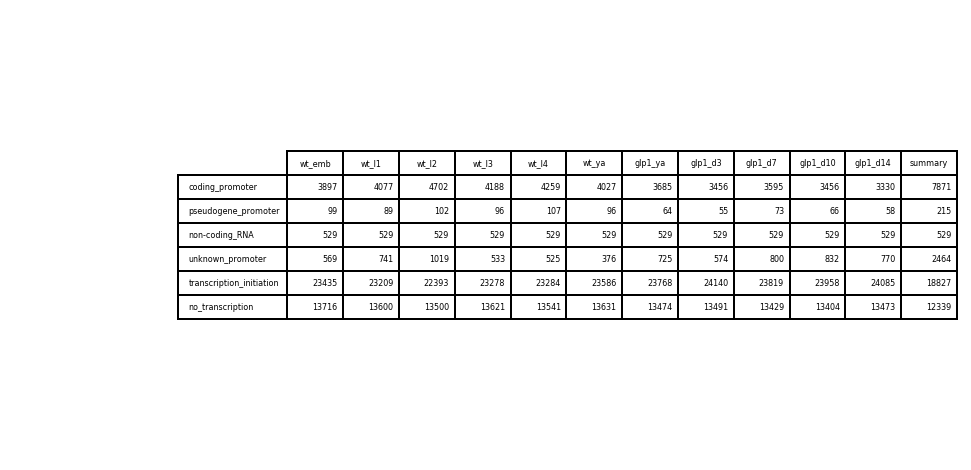

In [18]:
plt.subplot(111, frame_on=False)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)
pd.plotting.table(data=df_rev_, ax=plt.gca(), loc='center left')
#plt.savefig('annot/FigA_mapping/annot_crosstab_rev.pdf', bbox_inches='tight')

In [19]:
# Cross-tabulate strand-specific summary annotation
pd.crosstab(pd.Categorical(df_prom_fwd['annot_summary']), pd.Categorical(df_prom_rev['annot_summary'])).loc[list(d_annot_strand_legend.keys()), list(d_annot_strand_legend.keys())]

col_0,coding_promoter,pseudogene_promoter,non-coding_RNA,unknown_promoter,transcription_initiation,no_transcription
row_0,,,,,,
coding_promoter,2101,51,39,659,3695,1502
pseudogene_promoter,45,9,0,9,70,60
non-coding_RNA,45,2,55,25,128,278
unknown_promoter,676,17,26,73,1124,684
transcription_initiation,3589,78,113,1033,9804,4108
no_transcription,1415,58,296,665,4006,5707


In [41]:
m_prom = (df_prom_fwd['annot_summary'] == 'coding_promoter') | (df_prom_rev['annot_summary'] == 'coding_promoter')
m_both_scap = (df_prom_fwd['scap_mode_count'] >= 2) & (df_prom_rev['scap_mode_count'] >= 2)
f_ = sum(m_prom & m_both_scap) / sum(m_prom)
print('%d bidirect, %d with scap, %d both, %.2f' % (sum(m_prom), sum(m_both_scap), sum(m_prom & m_both_scap), 100*f_))

13817 bidirect, 21647 with scap, 9636 both, 69.74


In [20]:
# Visualise annotation as stranded .bed-files
def name_(annot, transcript_id):
    if (annot == 'coding_promoter') or (annot == 'pseudogene_promoter') or (annot == 'non-coding_RNA'):
        return transcript_id
    else:
        return ''

write_gffbed('annot/S2_regulatory_annotation/S2_regulatory_annotation_fwd.bed',
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = list(map(name_, df_prom_fwd['annot_summary'], df_exon_fwd['exon1_display_id'])),
    strand = '+',
    attr = df_prom_fwd[['annot_%(stage)s' % locals() for stage in config['stages'] + ['summary']]],
    itemRgb = map(lambda annot: d_annot_strand_legend[annot], df_prom_fwd['annot_summary']),
)

write_gffbed('annot/S2_regulatory_annotation/S2_regulatory_annotation_rev.bed',
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = list(map(name_, df_prom_rev['annot_summary'], df_exon_rev['exon1_display_id'])),
    strand = '-',
    attr = df_prom_rev[['annot_%(stage)s' % locals() for stage in config['stages'] + ['summary']]],
    itemRgb = map(lambda annot: d_annot_strand_legend[annot], df_prom_rev['annot_summary']),
)

In [21]:
# S2_outron-extended_genes.bed <- genes extended by outron regions as defined by (aggregated) promoter annotations
def df_outron_extended_genes_(df_prom_fwd_, df_prom_rev_):

    # df_prom_bounds <- prom min/max boundaries, based on promoter annotation
    df_prom_bounds_fwd = df_prom_fwd_.groupby(['exon1_gene_id', 'exon1_display_id']).agg({
        'chrom': lambda s: list(set(s))[0],
        'start': np.min,
        'end': np.max,
    }).reset_index()[['chrom', 'start', 'end', 'exon1_gene_id', 'exon1_display_id']]
    df_prom_bounds_fwd.columns = ['chrom', 'start', 'end', 'gene_id', 'display_id']

    df_prom_bounds_rev = df_prom_rev_.groupby(['exon1_gene_id', 'exon1_display_id']).agg({
        'chrom': lambda s: list(set(s))[0],
        'start': np.min,
        'end': np.max,
    }).reset_index()[['chrom', 'start', 'end', 'exon1_gene_id', 'exon1_display_id']]
    df_prom_bounds_rev.columns = ['chrom', 'start', 'end', 'gene_id', 'display_id']

    df_prom_bounds = pd.concat([df_prom_bounds_fwd, df_prom_bounds_rev], axis=0, ignore_index=False)\
        .sort_values(['chrom', 'start', 'end']).reset_index(drop=True)
    print('%d fwd %d rev %d pooled' % (len(df_prom_bounds_fwd), len(df_prom_bounds_rev), len(df_prom_bounds)))

    # Write a .bed-file of all the regions that changed
    fp_ = 'annot/S2_regulatory_annotation/_df_prom_bounds.bed'
    df_prom_bounds.to_csv(fp_, index=False, header=False, sep='\t')
    !wc -l {fp_}

    # df_gene_bounds <- gene min/max boundaries, based on annotation
    df_transcripts_ = yp.read_wbgtf('WS260_ce10/WS260_ce10.transcripts.annot.gtf.gz', parse_attr=False)
    df_transcripts = yp.df_gfftags_unpack(df_transcripts_, name='attribute')
    
    # Add display_id
    fp_geneIDs = 'wget/ftp.wormbase.org/pub/wormbase/releases/WS260/species/c_elegans/PRJNA13758/annotation/c_elegans.PRJNA13758.WS260.geneIDs.txt.gz'
    df_geneIDs = pd.read_csv(fp_geneIDs, sep=',', names=('na', 'gene_id', 'locus', 'sequence_id', 'status'))[['gene_id', 'locus', 'sequence_id', 'status']]

    def display_id_(locus, sequence_id, gene_id):
        if locus == locus:
            return locus
        elif sequence_id == sequence_id:
            return sequence_id
        else:
            return gene_id

    df_geneIDs['display_id'] = list(map(display_id_, df_geneIDs['locus'], df_geneIDs['sequence_id'], df_geneIDs['gene_id']))
    df_transcripts = pd.merge(df_transcripts, df_geneIDs[['gene_id', 'display_id']], left_on='gene_id', right_on='gene_id')

    df_gene_bounds = df_transcripts.groupby(['gene_id', 'display_id']).agg({
        'chrom': lambda s: list(set(s))[0],
        'start': np.min,
        'end': np.max,
    }).reset_index()[['chrom', 'start', 'end', 'gene_id', 'display_id']].sort_values(['chrom', 'start', 'end']).reset_index(drop=True)

    fp_ = 'annot/S2_regulatory_annotation/_df_gene_bounds.bed'
    df_gene_bounds.to_csv(fp_, index=False, header=False, sep='\t')
    !wc -l {fp_}
    
    df_ = df_prom_bounds.merge(df_gene_bounds, how='outer', on=['gene_id', 'display_id'], suffixes=('_prom', '_gene'))
    df_['start'] = list(map(int, map(np.nanmin, zip(df_['start_prom'], df_['start_gene']))))
    df_['end'] = list(map(int, map(np.nanmax, zip(df_['end_prom'], df_['end_gene']))))
    df_ = df_[['chrom_gene', 'start', 'end', 'gene_id', 'display_id']].sort_values(['chrom_gene', 'start', 'end']).reset_index(drop=True)
    df_.columns = [['chrom', 'start', 'end', 'gene_id', 'display_id']]
    return df_

q_ = '(annot_summary == "coding_promoter") | (annot_summary == "pseudogene_promoter") | (annot_summary == "non-coding_RNA")'
fp_outron_extended_genes = 'annot/S2_regulatory_annotation/S2c_outron-extended_genes.bed'
df_outron_extended_genes = df_outron_extended_genes_(
    pd.concat([df_prom_fwd, df_exon_fwd['exon1_gene_id'], df_exon_fwd['exon1_display_id']], axis=1).query(q_)[['chrom', 'start', 'end', 'annot_summary', 'exon1_gene_id', 'exon1_display_id']],
    pd.concat([df_prom_rev, df_exon_rev['exon1_gene_id'], df_exon_rev['exon1_display_id']], axis=1).query(q_)[['chrom', 'start', 'end', 'annot_summary', 'exon1_gene_id', 'exon1_display_id']],
)
df_outron_extended_genes.to_csv(fp_outron_extended_genes, index=False, header=False, sep='\t')
!wc -l {fp_outron_extended_genes}

5998 fwd 5894 rev 11892 pooled
11892 annot/S2_regulatory_annotation/_df_prom_bounds.bed


/mnt/home1/ahringer/jj374/relmapping/scripts/yarp/yarp.py:400: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df_name = df_name.convert_objects(convert_numeric=True)


23155 annot/S2_regulatory_annotation/_df_gene_bounds.bed
23155 annot/S2_regulatory_annotation/S2c_outron-extended_genes.bed


In [22]:
# df_associated_gene <- associated gene assignments
df_associated_gene = pd.read_csv(BedTool.from_dataframe(df_atac[['chrom', 'start', 'end']]).map(
    BedTool.from_dataframe(df_outron_extended_genes).fn, c='4,5', o='distinct,distinct',).fn, sep='\t',
    names=yp.NAMES_BED9[:5])
df_associated_gene.columns = ['chrom', 'start', 'end', 'associated_gene_id', 'associated_display_id']

In [23]:
# lcap_strand -- transcription directionality at a hypersensitive site, adapted from (Chen et al., 2013)
"""
def lcap_levels(df, stage, flank_len=300):
    step_fwd = 'coverage_q10_reads_by_stage_fwd'
    step_rev = 'coverage_q10_reads_by_stage_rev'
    fp_fwd = pf('lcap_%(stage)s' % locals(), step_fwd, '.bw', 'lcap_geo')
    fp_rev = pf('lcap_%(stage)s' % locals(), step_rev, '.bw', 'lcap_geo')
    (start, end) = ((df['atac_mode'] - flank_len).tolist(), (df['atac_mode'] + flank_len).tolist())
    df_levels = pd.DataFrame()
    df_levels['lcap_%(stage)s_fwd_levels' % locals()] = list(map(lambda a: int(np.nansum(a)), yp.read_regions(fp_fwd, df.chrom, start, end)))
    df_levels['lcap_%(stage)s_rev_levels' % locals()] = list(map(lambda a: int(np.nansum(a)), yp.read_regions(fp_rev, df.chrom, start, end))) 
    return df_levels

df_lcap_levels = pd.concat([lcap_levels(df_atac, stage) for stage in config['stages_wt']], axis=1)

def lcap_strand_(lcap_fwd, lcap_rev):
    if lcap_fwd > lcap_rev:
        return '+'
    elif lcap_fwd < lcap_rev:
        return '-'
    else:
        return '.'

fwd_ = df_lcap_levels[['lcap_%(stage)s_fwd_levels' % locals() for stage in config['stages_wt']]].sum(axis=1)
rev_ = df_lcap_levels[['lcap_%(stage)s_rev_levels' % locals() for stage in config['stages_wt']]].sum(axis=1)
df_lcap_levels['lcap_strand'] = list(map(lcap_strand_, fwd_, rev_))
df_lcap_levels['lcap_strand'].value_counts()
""";

In [24]:
# lcap_expr -- an attempt at quantifying promoter activity at hypersensitive sites
"""
def lcap_expr_fwd(chroms, modes, stage, inner_flank=50, outer_flank=300):
    step_fwd = 'normalised_coverage_fwd'
    fp_fwd = pf('lcap_%(stage)s' % locals(), step_fwd, '.bw', 'lcap_geo')
    (u_starts, u_ends) = ((modes - outer_flank).tolist(), (modes - inner_flank).tolist())    
    (d_starts, d_ends) = ((modes + inner_flank).tolist(), (modes + outer_flank).tolist())

    df = pd.DataFrame()
    df['u_mean'] = list(map(np.nanmedian, yp.mread_regions(fp_fwd, chroms, u_starts, u_ends)))
    df['d_mean'] = list(map(np.nanmedian, yp.mread_regions(fp_fwd, chroms, d_starts, d_ends)))
    return list(map(lambda x: max(x, 0), np.nan_to_num(df['d_mean'].values) - np.nan_to_num(df['u_mean'].values)))

def lcap_expr_rev(chroms, modes, stage, inner_flank=50, outer_flank=300):
    step_fwd = 'normalised_coverage_fwd'
    fp_fwd = pf('lcap_%(stage)s' % locals(), step_fwd, '.bw', 'lcap_geo')
    (u_starts, u_ends) = ((modes + inner_flank).tolist(), (modes + outer_flank).tolist())
    (d_starts, d_ends) = ((modes - outer_flank).tolist(), (modes - inner_flank).tolist())

    df = pd.DataFrame()
    df['u_mean'] = list(map(np.nanmedian, yp.mread_regions(fp_fwd, chroms, u_starts, u_ends)))
    df['d_mean'] = list(map(np.nanmedian, yp.mread_regions(fp_fwd, chroms, d_starts, d_ends)))
    return list(map(lambda x: max(x, 0), np.nan_to_num(df['d_mean'].values) - np.nan_to_num(df['u_mean'].values)))

def lcap_expr_fwd_(stage_):
    df_atac = pd.read_csv('annot/S1_accessible_sites/S1a_accessible_sites.tsv' % locals(), sep='\t')
    return pd.DataFrame({'lcap_expr_%s_fwd' % (stage_,): 
                         lcap_expr_fwd(df_atac['chrom'], df_atac['atac_mode'], stage_)})

def lcap_expr_rev_(stage_):
    df_atac = pd.read_csv('annot/S1_accessible_sites/S1a_accessible_sites.tsv' % locals(), sep='\t')
    return pd.DataFrame({'lcap_expr_%s_rev' % (stage_,): 
                         lcap_expr_rev(df_atac['chrom'], df_atac['atac_mode'], stage_)})

df_expr_fwd = pd.concat(pmap(lcap_expr_fwd_, config['stages'], n_jobs=20), axis=1)
df_expr_rev = pd.concat(pmap(lcap_expr_rev_, config['stages'], n_jobs=20), axis=1)

write_gffbed('annot/S2_regulatory_annotation/S2_regulatory_annotation.lcap_expr_fwd.bed',
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    #name = df_exon_fwd['exon1_transcript_id'],
    #strand = '+',
    attr = df_expr_fwd,
)

write_gffbed('annot/S2_regulatory_annotation/S2_regulatory_annotation.lcap_expr_rev.bed',
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    #name = df_exon_rev['exon1_transcript_id'],
    #strand = '-',
    attr = df_expr_rev,
)
""";

In [25]:
# Match hypersensitive sites to closest downstream/overlapping gene, as defined by lcap strandedness
"""
def df_closest_(df_a, df_b, b_prefix, **kwargs):
    df_a_sort = df_a
    df_b_sort = df_b.sort_values(list(df_b.columns[:3]))
    fn_ = BedTool.from_dataframe(df_a).closest(BedTool.from_dataframe(df_b_sort).fn, **kwargs).fn
    names_ = list(itertools.chain(df_a.columns.values,
        ['%s_%s' % (b_prefix, col) for col in df_b.columns.values],
        ['%s_distance' % (b_prefix)]
    ))
    df_ = pd.read_csv(fn_, names=names_, sep='\t')
    return df_#[names_[len(df_a.columns):]]

df_genes_ = pd.read_csv('WS260_ce10/WS260_ce10.genes_display_id.bed', sep='\t', names=yp.NAMES_BED6 + ['display_id',])

df_ = pd.concat([df_atac['chrom'], df_atac['start'], df_atac['end']], axis=1).copy()
df_['name'] = '.'
df_['score'] = '0'
df_['strand '] = df_lcap_levels['lcap_strand']

df_txnd_ = df_closest_(df_, df_genes_, 'txnd', D='a', iu=True, t='all')
df_txnd = df_txnd_.groupby(df_.columns.tolist()).agg({
    'txnd_chrom': lambda s: ','.join(map(str, s)),
    'txnd_start': lambda s: ','.join(map(str, s)),
    'txnd_end': lambda s: ','.join(map(str, s)),
    'txnd_score': lambda s: ','.join(map(str, s)),
    'txnd_name': lambda s: ','.join(map(str, s)),
    'txnd_score': lambda s: ','.join(map(str, s)),
    'txnd_strand': lambda s: ','.join(map(str, s)),
    'txnd_display_id': lambda s: ','.join(map(str, s)),
    'txnd_distance': lambda s: ','.join(map(str, s)),
    'txnd_score': len,
}).reset_index().sort_values(df_.columns.tolist())
print('%d sites overlap more than one gene' % len(df_txnd.query('txnd_score > 1')))
assert len(df_txnd) == len(df_atac)
#df_txnd.query('txnd_score > 1') # browse sites that get more than one gene assigned
""";

In [26]:
# Visualise lcap-derived transcriptional directionality and "enhancer gene assignments"
"""
d_strand_colour = {
    '+': yp.RED,
    '-': yp.BLUE,
    '.': yp.BLACK,
}

write_gffbed('annot/S2_regulatory_annotation/txnd.bed',
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_txnd['txnd_display_id'],
    strand = df_lcap_levels['lcap_strand'],
    itemRgb = map(lambda strand: d_strand_colour[strand], df_lcap_levels['lcap_strand']),
)
""";

In [27]:
# Table S2 -- unstranded summary annotation
def name_(annot_fwd, annot_rev, display_id_fwd, display_id_rev, enhancer_display_id):
    if (annot_fwd in config['annot_with_gene_id']) and not(annot_rev in config['annot_with_gene_id']):
        return display_id_fwd
    elif not(annot_fwd in config['annot_with_gene_id']) and (annot_rev in config['annot_with_gene_id']):
        return display_id_rev
    elif (annot_fwd in config['annot_with_gene_id']) and (annot_rev in config['annot_with_gene_id']):
        return '%s / %s' % (display_id_rev, display_id_fwd)
    elif enhancer_display_id != '.': # show "likeliest target gene for an enhancer" in brackets for all remaining (=not coding_promoter or non_coding_promoter)
        return '(%s)' % (enhancer_display_id,)
    else:
        return ''

def annot_(annot_fwd, annot_rev):
    if annot_fwd == 'coding_promoter' or annot_rev == 'coding_promoter':
        return 'coding_promoter'
    elif annot_fwd == 'pseudogene_promoter' or annot_rev == 'pseudogene_promoter':
        return 'pseudogene_promoter'
    elif annot_fwd == 'non-coding_RNA' or annot_rev == 'non-coding_RNA':
        return 'non-coding_RNA'
    elif annot_fwd == 'unknown_promoter' or annot_rev == 'unknown_promoter':
        return 'unknown_promoter'
    elif annot_fwd == 'transcription_initiation' or annot_rev == 'transcription_initiation':
        return 'putative_enhancer'
    elif annot_fwd == 'no_transcription' or annot_rev == 'no_transcription':
        return 'other_element'
    assert False

def strand_(annot_fwd, annot_rev):
    promoter_fwd = (annot_fwd in config['annot_with_gene_id'])
    promoter_rev = (annot_rev in config['annot_with_gene_id'])
    lcap_fwd = annot_fwd == 'unknown_promoter'
    lcap_rev = annot_rev == 'unknown_promoter'
    if promoter_fwd and promoter_rev:
        return '.'
    elif promoter_fwd and (not promoter_rev):
        return '+'
    elif (not promoter_fwd) and promoter_rev:
        return '-'
    # in the absence of promoter annotations with an "annotated" target, use unknown_promoter annotations for strand
    elif lcap_fwd and lcap_rev:
        return '.'
    elif lcap_fwd and (not lcap_rev):
        return '+'
    elif (not lcap_fwd) and lcap_rev:
        return '-'
    else:
        return '.'

df_regl = df_atac[['chrom', 'start', 'end', 'atac_mode']].copy()
df_regl['tss_fwd'] = df_prom_fwd['scap_mode']
df_regl['tss_rev'] = df_prom_rev['scap_mode']
df_regl['scap_mode_fwd'] = df_prom_fwd['scap_mode']
df_regl['scap_mode_rev'] = df_prom_rev['scap_mode']
df_regl['scap_mode_count_fwd'] = df_prom_fwd['scap_mode_count']
df_regl['scap_mode_count_rev'] = df_prom_rev['scap_mode_count']
df_regl['scap_count_fwd'] = df_prom_fwd['scap_count']
df_regl['scap_count_rev'] = df_prom_rev['scap_count']
df_regl['annot_fwd'] = df_prom_fwd['annot_summary']
df_regl['annot_rev'] = df_prom_rev['annot_summary']
df_regl['annot'] = list(map(annot_, df_prom_fwd['annot_summary'], df_prom_rev['annot_summary']))
df_regl['strand'] = list(map(strand_, df_prom_fwd['annot_summary'], df_prom_rev['annot_summary']))
df_regl['label'] = list(map(name_,
    df_prom_fwd['annot_summary'], df_prom_rev['annot_summary'],                     
    df_exon_fwd['exon1_display_id'], df_exon_rev['exon1_display_id'],
    df_associated_gene['associated_display_id']
))

df_regl['promoter_gene_id_fwd'] = df_exon_fwd['exon1_gene_id']
df_regl['promoter_gene_id_rev'] = df_exon_rev['exon1_gene_id']

df_regl['promoter_locus_id_fwd'] = df_exon_fwd['exon1_display_id']
df_regl['promoter_locus_id_rev'] = df_exon_rev['exon1_display_id']

df_regl['promoter_gene_biotype_fwd'] = df_exon_fwd['exon1_gene_biotype']
df_regl['promoter_gene_biotype_rev'] = df_exon_rev['exon1_gene_biotype']

m_gene_id_fwd = list(map(lambda annot: not(annot in config['annot_with_gene_id']), df_regl['annot_fwd']))
m_gene_id_rev = list(map(lambda annot: not(annot in config['annot_with_gene_id']), df_regl['annot_rev']))
df_regl.loc[m_gene_id_fwd, 'promoter_gene_id_fwd'] = '.'
df_regl.loc[m_gene_id_rev, 'promoter_gene_id_rev'] = '.'
df_regl.loc[m_gene_id_fwd, 'promoter_locus_id_fwd'] = '.'
df_regl.loc[m_gene_id_rev, 'promoter_locus_id_rev'] = '.'
df_regl.loc[m_gene_id_fwd, 'promoter_gene_biotype_fwd'] = '.'
df_regl.loc[m_gene_id_rev, 'promoter_gene_biotype_rev'] = '.'

df_regl['associated_gene_id'] = df_associated_gene['associated_gene_id']
df_regl['associated_locus_id'] = df_associated_gene['associated_display_id']

for stage in config['stages_wt'] + config['stages_glp1']:
    df_regl['atac_%s_height' % (stage,)] = df_atac['atac_%s_height' % (stage,)]

fp_ = 'annot/S2_regulatory_annotation/S2_regulatory_annotation.tsv'
l_ = [
    'chrom', 'start', 'end', 
    'annot', 'annot_fwd', 'annot_rev',
    'promoter_gene_id_fwd', 'promoter_locus_id_fwd', 'promoter_gene_biotype_fwd',
    'promoter_gene_id_rev', 'promoter_locus_id_rev', 'promoter_gene_biotype_rev',
    'associated_gene_id', 'associated_locus_id',
    'atac_mode',
] + ['atac_%s_height' % (stage,) for stage in config['stages_wt'] + config['stages_glp1']] + [\
    'tss_fwd', 'tss_rev',
    #'scap_mode_count_fwd', 'scap_mode_count_rev',
    #'scap_count_fwd', 'scap_count_rev',
]

pd.concat([df_regl[l_], df_lcap], axis=1).to_csv(fp_, header=True, index=False, sep='\t')

KeyError: 'atac_glp1_d1_height'

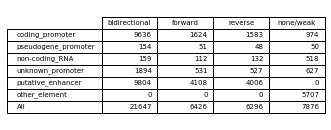

In [55]:
def scap_bidirectionality(mode_count_fwd, mode_count_rev):
    if mode_count_fwd >= 2 and mode_count_rev >= 2:
        return 'bidirectional'
    elif mode_count_fwd >= 2:
        return 'forward'
    elif mode_count_rev >= 2:
        return 'reverse'
    else:
        return 'none/weak'

df_has_scap = pd.DataFrame()
df_has_scap['annot'] = df_regl['annot']
df_has_scap['scap_bidirectionality'] = list(map(scap_bidirectionality, 
    df_prom_fwd['scap_mode_count'], df_prom_rev['scap_mode_count']))
df_has_scap['scap_bidirectionality'].value_counts()

df_ = pd.crosstab(pd.Categorical(df_has_scap['annot']), pd.Categorical(df_has_scap['scap_bidirectionality']),
                 margins=True)\
.loc[config['annot'] + ['All'], ['bidirectional', 'forward', 'reverse', 'none/weak']]

fig = plt.figure(figsize=(4,2))
plt.subplot(111, frame_on=False)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)
pd.plotting.table(data=df_, ax=plt.gca(), loc='center left')
plt.savefig('annot/FigA_mapping/annot_crosstab_scap.pdf', bbox_inches='tight')

In [64]:
# Visualise annotation as a single, unstranded .bed-file
def write_regl_bed9(fp_, df_regl_):
    write_gffbed(fp_,
        chrom = df_regl_['chrom'],
        start = df_regl_['start'],
        end = df_regl_['end'],
        name = df_regl_['label'],
        strand = df_regl_['strand'],
        itemRgb = list(map(lambda annot: d_annot_legend[annot], df_regl_['annot'])),
        attr = df_regl_[['annot', 'annot_fwd', 'annot_rev']],
    )

write_regl_bed9('annot/S2_regulatory_annotation/S2_regulatory_annotation.bed', df_regl)

In [65]:
for annot in config['annot']:
    fp_ = 'annot/S2_regulatory_annotation/S2_regulatory_annotation_6Dec17.%s_only.bed' % (annot,)
    write_regl_bed9(fp_, df_regl.query('annot == "%s"' % (annot,)).reset_index(drop=True))
    !wc -l {fp_}

13818 annot/S2_regulatory_annotation/S2_regulatory_annotation_6Dec17.coding_promoter_only.bed
304 annot/S2_regulatory_annotation/S2_regulatory_annotation_6Dec17.pseudogene_promoter_only.bed
922 annot/S2_regulatory_annotation/S2_regulatory_annotation_6Dec17.non-coding_RNA_only.bed
3580 annot/S2_regulatory_annotation/S2_regulatory_annotation_6Dec17.unknown_promoter_only.bed
17919 annot/S2_regulatory_annotation/S2_regulatory_annotation_6Dec17.putative_enhancer_only.bed
5708 annot/S2_regulatory_annotation/S2_regulatory_annotation_6Dec17.other_element_only.bed


2281 bidirectional promoters
5856 forward-only promoters
5680 reverse-only promoters


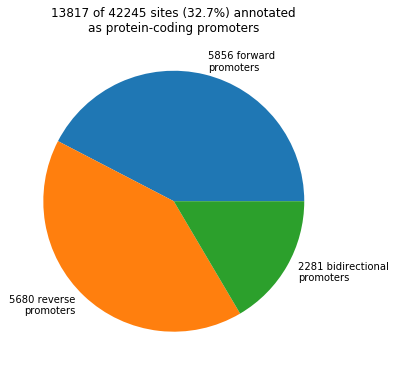

In [48]:
# Visualise number of promoters called
n_bid = len(df_regl.query('(annot == "coding_promoter") & (strand == ".")'))
n_fwd = len(df_regl.query('(annot == "coding_promoter") & (strand == "+")'))
n_rev = len(df_regl.query('(annot == "coding_promoter") & (strand == "-")'))
print('%d bidirectional promoters' % (n_bid))
print('%d forward-only promoters' % (n_fwd,))
print('%d reverse-only promoters' % (n_rev,))
plt.figure(figsize=(16,6)).subplots_adjust(wspace=0.4)
plt.subplot(1,2,1, aspect=1)
plt.title('%d of %d sites (%.1f%%) annotated\nas protein-coding promoters' % \
    (n_fwd + n_rev + n_bid, len(df_regl), 100 * (n_fwd + n_rev + n_bid) / float(len(df_regl)),))
plt.pie([n_fwd, n_rev, n_bid], labels=[
        '%(n_fwd)d forward\npromoters' % locals(),
        '%(n_rev)d reverse\npromoters' % locals(), 
        '%(n_bid)d bidirectional\npromoters' % locals(),
])[-1][-1]